#### Cross Validation Task

### 약물 A, B, C, X, Y
##### 다중 분류(Multiclass Classification)
- 의학 연구원으로서 동일한 질병을 앓고 있는 일련의 환자에 대한 데이터를 수집했다.
- 치료 과정 동안 각 환자는 5가지 약물, 즉 약물 A, 약물 B, 약물 c, 약물 x 및 y 중 하나에 반응했다.
-  미래에 동일한 질병을 앓는 환자에게 어떤 약물이 적합할 수 있는지 알아보기 위한 모델을 구축한다.

feature 
- Age : 환자의 나이
- Sex : 환자의 성별
- BP : 혈압
- Cholesterol : 콜레스테롤 수치
- Na_to_K : 나트륨 - 칼륨

target
- Drug : 의약품, 환자에게 효과가 있었던 약 

In [1]:
import pandas as pd
drug_df = pd.read_csv('./datasets/drugs.csv')
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


#### 나트륨 - 칼륨의 이상치를 제거 하고, LabelEncoder()로 수치형으로 변경 후에 파이썬 리스트로 전달 > 데이터 세트 분리

In [2]:
na_k_df = drug_df.loc[:, 'Na_to_K'].reset_index()
na_k_df

,index,Na_to_K
0,0,25.355
1,1,13.093
2,2,10.114
3,3,7.798
4,4,18.043
...,...,...
195,195,11.567
196,196,12.006
197,197,9.894
198,198,14.020


In [3]:
from sklearn.preprocessing import StandardScaler
# 데이터의 평균을 0, 분산을 1이 되도록 표준 정규분포를 따르게 하는 스케일링 
# ± 1.96을 벗어나면 이상치로 판단한다.
std = StandardScaler()
std_na_k = std.fit_transform(na_k_df[['Na_to_K']])
std_na_k # 표준 정규 분포 결과 

array([[ 1.28652212],
       [-0.4151454 ],
       [-0.82855818],
       [-1.14996267],
       [ 0.27179427],
       [-1.03769314],
       [ 0.02643885],
       [-0.70046821],
       [-0.12676951],
       [ 0.45567206],
       [-0.59916196],
       [ 0.43221897],
       [-0.09832049],
       [ 0.674105  ],
       [-0.46926791],
       [-0.0788919 ],
       [-0.64245998],
       [-0.29316156],
       [-1.21935052],
       [ 1.37242427],
       [ 0.42236589],
       [ 1.36451406],
       [ 2.00995979],
       [-0.14550423],
       [ 2.41490725],
       [ 0.37809645],
       [ 1.9819271 ],
       [-0.93028076],
       [ 0.91765633],
       [ 0.25902691],
       [-1.01784822],
       [-0.90446848],
       [-0.70366006],
       [ 2.19147839],
       [-0.27081868],
       [-1.2211546 ],
       [-0.92139911],
       [-0.29787994],
       [-0.88476233],
       [-0.97149714],
       [ 0.43527203],
       [-0.25610845],
       [-0.04086736],
       [-0.53074555],
       [-0.5258884 ],
       [-1

In [4]:
na_k_df['Na_to_K'] = std_na_k
na_k_df # 나트륨 칼륨 df 에 표준화 적용 

,index,Na_to_K
0,0,1.286522
1,1,-0.415145
2,2,-0.828558
3,3,-1.149963
4,4,0.271794
...,...,...
195,195,-0.626917
196,196,-0.565995
197,197,-0.859089
198,198,-0.286500


In [5]:
# between으로도 활용가능 
# na_k_df = nana_k_df[na_na_k_df['Na_to_K'].between(-1.96,1.96)]
a1 = na_k_df['Na_to_K'] >= -1.96
a2 = na_k_df['Na_to_K'] <= 1.96
a = a1 & a2
drug_df = drug_df.iloc[na_k_df[a].index].reset_index(drop=True)
drug_df
# 이상치 제거 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
183,56,F,LOW,HIGH,11.567,drugC
184,16,M,LOW,HIGH,12.006,drugC
185,52,M,NORMAL,HIGH,9.894,drugX
186,23,M,NORMAL,NORMAL,14.020,drugX


In [6]:
drug_enc_df = drug_df.copy() # 범주형 데이터를 수치형으로 변경하기 전 미리 복사를 한다.

In [7]:
from sklearn.preprocessing import LabelEncoder

drug_encoder = LabelEncoder()
targets = drug_encoder.fit_transform(drug_df['Drug'].tolist())
drug_enc_df['Drug'] = targets

g_encoder = LabelEncoder()
genders = g_encoder.fit_transform(drug_df['Sex'].tolist())
drug_enc_df['Sex'] = genders

bp_encoder = LabelEncoder()
bps = bp_encoder.fit_transform(drug_df['BP'].tolist())
drug_enc_df['BP'] = bps

c_encoder = LabelEncoder()
chols = c_encoder.fit_transform(drug_df['Cholesterol'].tolist())
drug_enc_df['Cholesterol'] = chols

In [8]:
drug_encoder.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype='<U5')

In [9]:
drug_encoder.inverse_transform(drug_enc_df['Drug'])

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugB', 'drugX', 'drugX', 'drugX', 'drugA', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugB', 'drugY', 'drugX', 'drugX', 'drugX',
       'drugA', 'drugC', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugC', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugY', 'drugX', 'drugB', 'drugY', 'drugA', 'drugX',
       'drugY', 'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugA', 'drugY', 'drugA', 'drugX', 'drugB', 'drugX',
       'drugC', 'drugA', 'drugC', 'drugB', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugA', 'drugA', 'drugC', 'drugX', 'drugY',
       'drugX', 'dru

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()

features, targets = drug_enc_df.iloc[:,:-1] , drug_enc_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()

features, targets = drug_enc_df.iloc[:,:-1] , drug_enc_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

dtc = DecisionTreeClassifier() # 객체 형태로 전달 
parameters = {'max_depth' : [3,4,5],'min_samples_split' : [15,16,17]}

In [12]:
from sklearn.model_selection import GridSearchCV
drug_dtc = GridSearchCV(dtc, param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [13]:
drug_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [15, 16, 17]},
             return_train_score=True)

In [14]:
drug_dtc.cv_results_

{'mean_fit_time': array([0.00405178, 0.00558734, 0.00527973, 0.00408669, 0.00355396,
        0.00349598, 0.00292106, 0.00290327, 0.00392694]),
 'std_fit_time': array([0.00118438, 0.00083369, 0.00069085, 0.00119226, 0.00048309,
        0.00076008, 0.00079422, 0.00046298, 0.00422157]),
 'mean_score_time': array([0.00189915, 0.00231056, 0.0024581 , 0.00139513, 0.00180259,
        0.00185075, 0.00149031, 0.00179996, 0.00166302]),
 'std_score_time': array([0.0004593 , 0.00035898, 0.00084619, 0.00049343, 0.0004016 ,
        0.00042929, 0.00052008, 0.00040073, 0.00055247]),
 'param_max_depth': masked_array(data=[3, 3, 3, 4, 4, 4, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[15, 16, 17, 15, 16, 17, 15, 16, 17],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_va

In [15]:
result_df = pd.DataFrame(drug_dtc.cv_results_)
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004052,0.001184,0.001899,0.000459,3,15,"{'max_depth': 3, 'min_samples_split': 15}",0.8,0.9,0.9,...,0.873333,0.048990,7,0.916667,0.916667,0.908333,0.933333,0.908333,0.916667,0.009129
1,0.005587,0.000834,0.002311,0.000359,3,16,"{'max_depth': 3, 'min_samples_split': 16}",0.8,0.9,0.9,...,0.873333,0.048990,7,0.916667,0.916667,0.908333,0.933333,0.908333,0.916667,0.009129
2,0.005280,0.000691,0.002458,0.000846,3,17,"{'max_depth': 3, 'min_samples_split': 17}",0.8,0.9,0.9,...,0.873333,0.048990,7,0.916667,0.916667,0.908333,0.933333,0.908333,0.916667,0.009129
3,0.004087,0.001192,0.001395,0.000493,4,15,"{'max_depth': 4, 'min_samples_split': 15}",1.0,1.0,1.0,...,0.993333,0.013333,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.003554,0.000483,0.001803,0.000402,4,16,"{'max_depth': 4, 'min_samples_split': 16}",1.0,1.0,1.0,...,0.993333,0.013333,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.003496,0.000760,0.001851,0.000429,4,17,"{'max_depth': 4, 'min_samples_split': 17}",1.0,1.0,1.0,...,0.993333,0.013333,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.002921,0.000794,0.001490,0.000520,5,15,"{'max_depth': 5, 'min_samples_split': 15}",1.0,1.0,1.0,...,0.993333,0.013333,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.002903,0.000463,0.001800,0.000401,5,16,"{'max_depth': 5, 'min_samples_split': 16}",1.0,1.0,1.0,...,0.993333,0.013333,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.003927,0.004222,0.001663,0.000552,5,17,"{'max_depth': 5, 'min_samples_split': 17}",1.0,1.0,1.0,...,0.993333,0.013333,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [16]:
print(drug_dtc.best_params_, drug_dtc.best_score_, sep='\n')

{'max_depth': 4, 'min_samples_split': 15}
0.9933333333333334


In [17]:
drug_dtc.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=15)

In [18]:
from sklearn.metrics import accuracy_score
dtc = drug_dtc.best_estimator_
prediction = dtc.predict(X_test)
accuracy_score(y_test, prediction)
# 평가 까지 완료 

0.9736842105263158

In [19]:
drug_encoder.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype='<U5')

In [20]:
from sklearn.tree import export_graphviz

export_graphviz(dtc, out_file='./images/drug_dtc02.dot', class_names=drug_encoder.classes_, feature_names=features.columns, 
                impurity=True, filled=True)

In [21]:
# 결정 트리를 통해 과적합 분석 
import graphviz

with open('./images/drug_dtc02.dot') as f :
    drug_dtc02 = f.read()

drug_dtc02_graph = graphviz.Source(drug_dtc02)

In [22]:
drug_dtc02_graph.render(filename="drug_dtc02", directory="./images", format="png")

'images\\drug_dtc02.png'

<img src="./images/drug_dtc02.png">

In [23]:
dtc.feature_importances_

array([0.1396648 , 0.        , 0.28576287, 0.1255259 , 0.44904643])

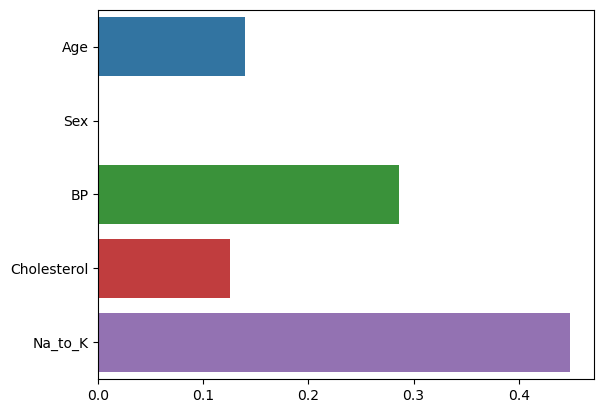

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

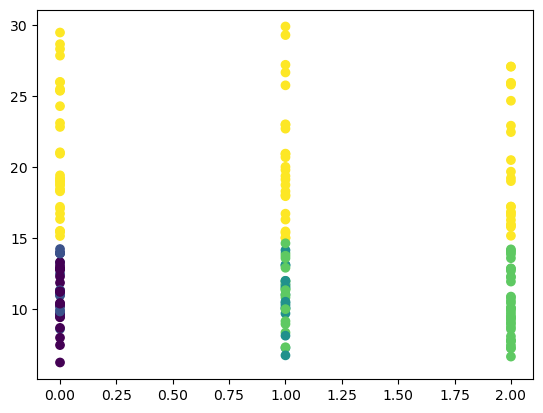

In [25]:
plt.scatter(features.iloc[:,2], features.iloc[:,-1], c=targets)

In [26]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)


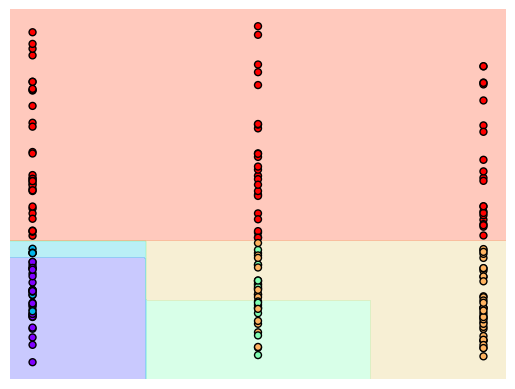

In [27]:
features_2_4 = features.iloc[:,[2,4]]
visualize_boundary(dtc, features_2_4, targets)

In [28]:
drug_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [15, 16, 17]},
             return_train_score=True)

In [29]:
from sklearn.metrics import accuracy_score
dtc = drug_dtc.best_estimator_
accuracy_score(y_test, dtc.predict(X_test.values))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9736842105263158